<a href="https://colab.research.google.com/github/sayana25/IQCQ-UPES-2023/blob/main/IQCQ2023_MultiQubitgates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 11.2 MB/s eta 0:00:00


In [4]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=da7b367c049b796e84a6e202a263cce377a2b48fbee15fb3ce5a4a3c1f9ce8bf
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [5]:
pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.0 MB/s eta 0:00:00


In [11]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, assemble, Aer, IBMQ, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_histogram, plot_state_city

What simulators are included in Qiskit-Aer?



In [29]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

Qiskit Aer currently includes three high performance simulator backends:

* **QasmSimulator**: Allows ideal and noisy multi-shot execution of qiskit circuits and returns counts or memory.


* **StatevectorSimulator:** Allows ideal single-shot execution of qiskit circuits and returns the final statevector of the simulator after application


* **UnitarySimulator**: Allows ideal single-shot execution of qiskit circuits and returns the final unitary matrix of the circuit itself. Note that the circuit cannot contain measure or reset operations for this backend.

Ref : https://qiskit.org/documentation/stable/0.24/tutorials/simulators/1_aer_provider.html

**Construct the Bell state $|\phi^+\rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle\right)$ and run on the IBM statevector simulator**.

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


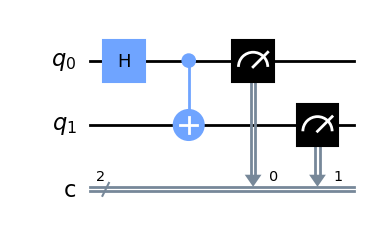

In [25]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2,2)
circ.h(0)
circ.cx(0, 1)
circ.measure([0,1], [0,1])
circ.draw('mpl')

In [27]:
# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get memory
result = execute(circ, simulator, shots=100, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '00', '11', '00', '11', '00', '11', '00', '11', '11', '11', '00', '11', '11', '11', '00', '00', '11', '11', '11', '11', '11', '11', '11', '00', '00', '00', '11', '11', '11', '00', '11', '11', '00', '00', '00', '00', '00', '11', '11', '00', '11', '00', '00', '11', '00', '00', '00', '00', '00', '11', '11', '11', '00', '00', '00', '00', '11', '11', '11', '11', '11', '00', '00', '11', '11', '11', '11', '11', '00', '11', '11', '00', '00', '11', '00', '11', '11', '00', '00', '00', '00', '11', '00', '00', '11', '00', '00', '00', '11', '11', '00', '00', '11', '11', '00', '11', '11', '11', '00']


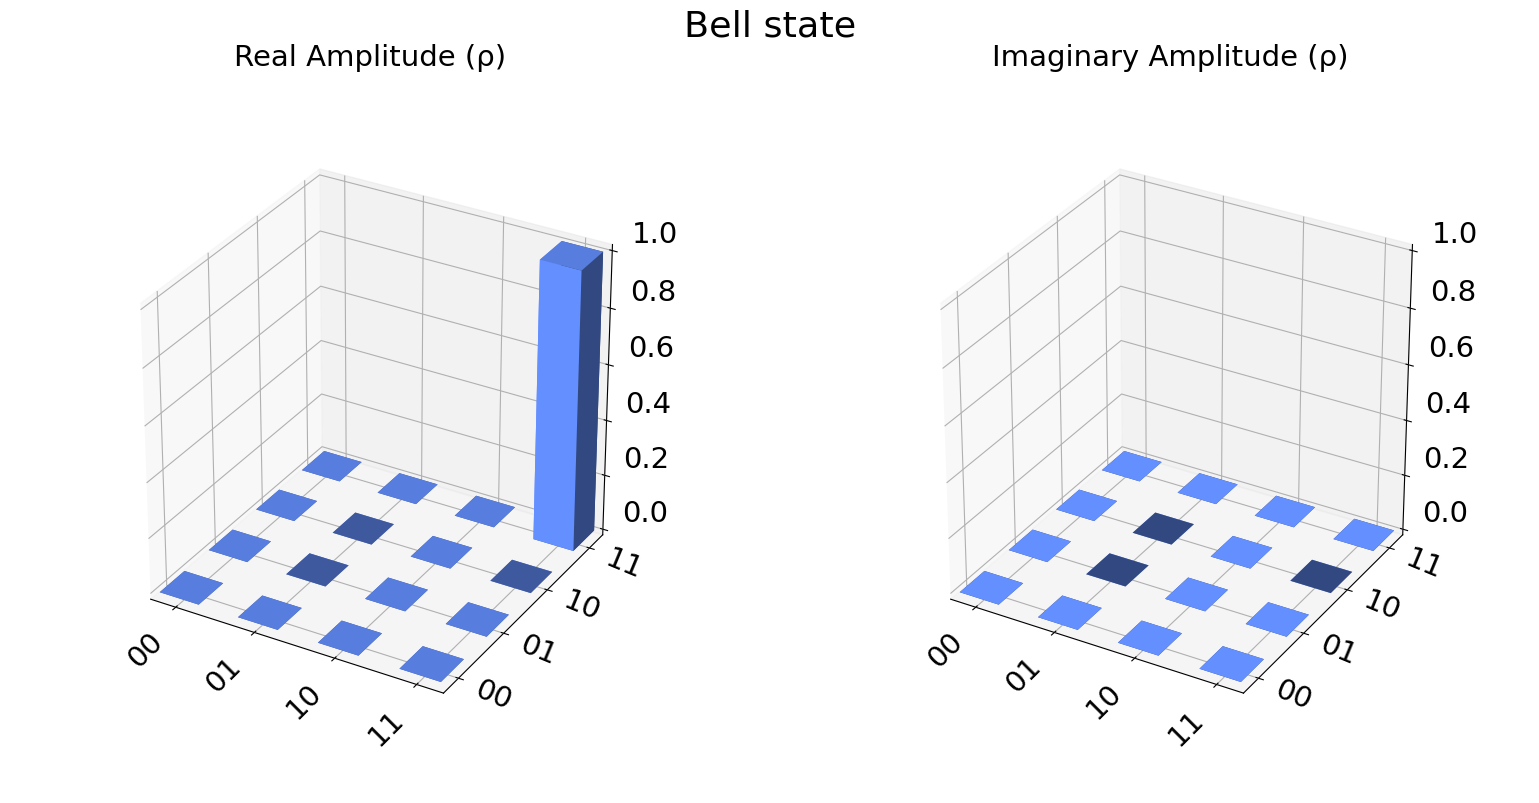

In [28]:
# Select the StatevectorSimulator from the Aer provider
simulator = Aer.get_backend('statevector_simulator')

# Execute and get counts
result = execute(circ, simulator).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')

**Construct the Bell state $|\Psi^+\rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)$ and run on the IBM quantum simulator**.

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


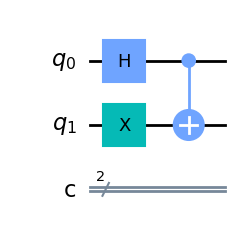

In [6]:
def psiplus():
    qc = QuantumCircuit(2,2) # this time, we not only want two qubits, but also two classical bits for the measurement
    qc.h(0)
    qc.x(1)
    qc.cx(0,1)
    return qc

qc = psiplus()
qc.draw('mpl') # we draw the circuit

We now add measurement to the above circuit and execute it (using the simulator) and plot the histogram of the corresponding counts.

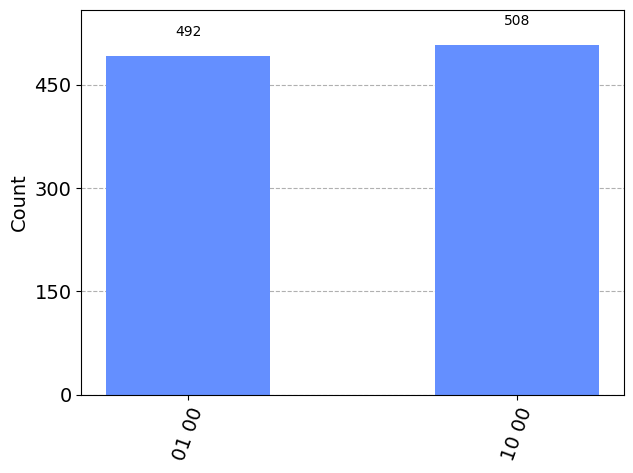

In [7]:
qc.measure_all() # we measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

 Write a function that builds a quantum circuit on 3 qubits and creates the GHZ state $|GHZ\rangle = \frac{1}{\sqrt{2}} \left(|000\rangle + |111 \rangle \right)$ and the GHZ-like state, $|\Psi\rangle = \frac{1}{\sqrt{2}} \left(|010\rangle - |101 \rangle \right)$, the GHZ state. In both cases we run on the simulator and try to see the output state probabilities.

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


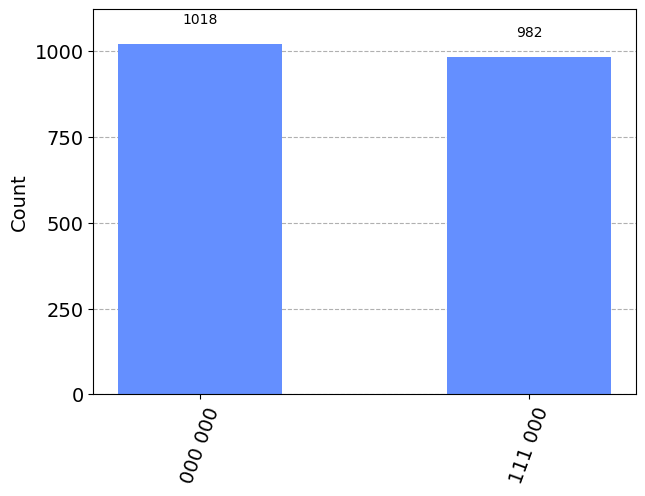

In [17]:
#lets first construct the circuit for the GHZ state

def GHZ():
    circ = QuantumCircuit(3,3)
    circ.h(0)
    circ.cx(0,1)
    circ.cx(1,2)
    return circ


circ = GHZ()
circ.draw('mpl') # draw the circuit

circ.measure_all() # measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(circ, backend, shots = 2000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # plot a histogram to see the possible outcomes and corresponding probabilities

/usr/local/lib/python3.10/dist-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


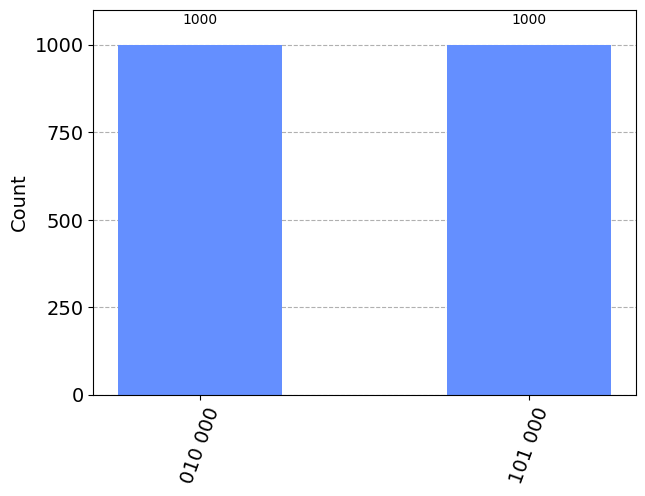

In [16]:
def GHZlike():
    circ = QuantumCircuit(3,3)
    circ.h(0)
    circ.z(0)
    circ.x(1)
    circ.x(2)
    circ.cx(0,1)
    circ.cx(1,2)
    return circ


circ = GHZlike()
circ.draw('mpl') # draw the circuit

circ.measure_all() # measure all the qubits
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(circ, backend, shots = 2000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # plot a histogram to see the possible outcomes and corresponding probabilities

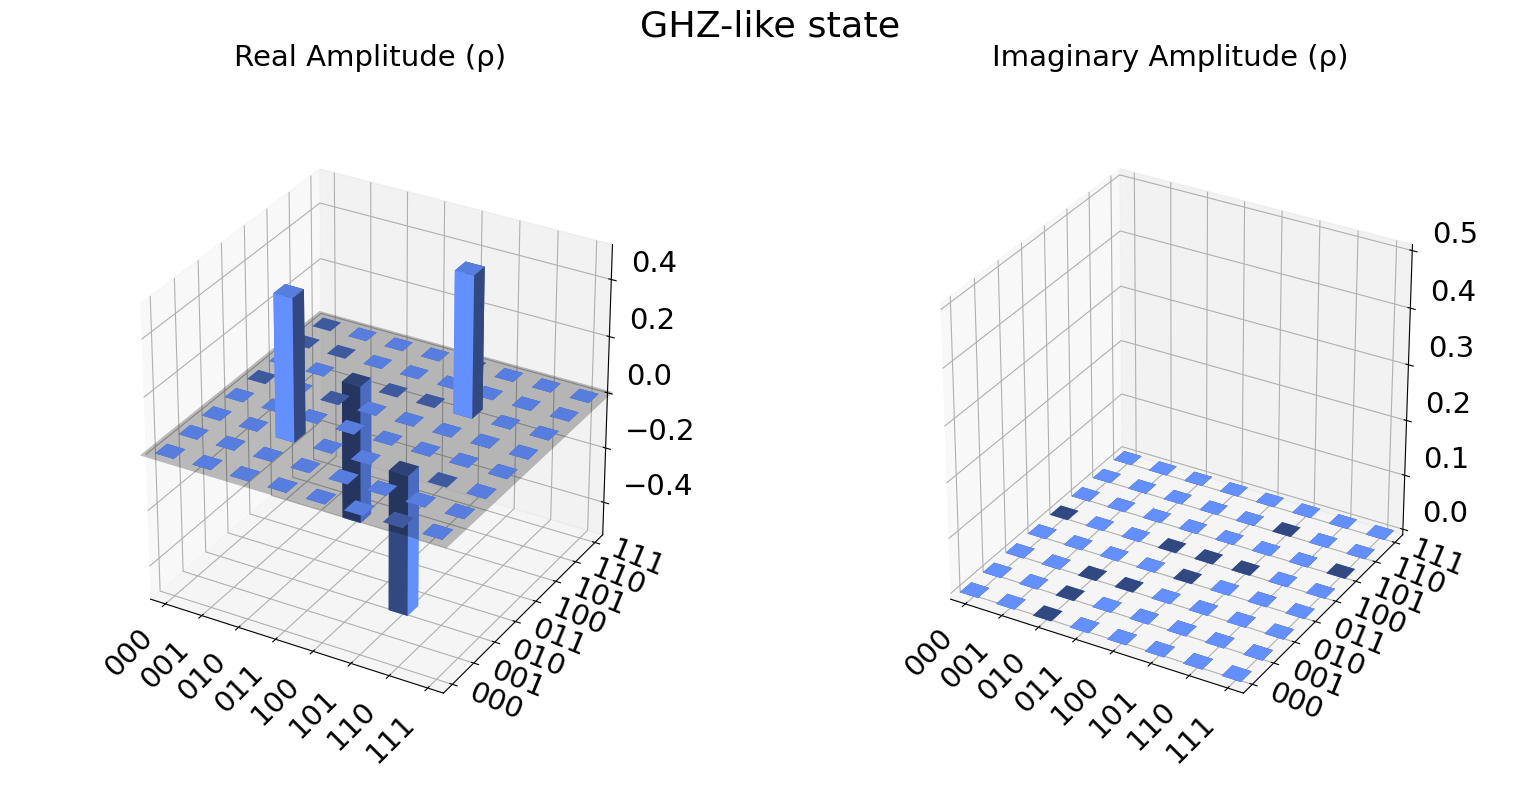

In [30]:
def GHZlike():
    circ = QuantumCircuit(3,3)
    circ.h(0)
    circ.z(0)
    circ.x(1)
    circ.x(2)
    circ.cx(0,1)
    circ.cx(1,2)
    return circ


qc = GHZlike()
qc.draw('mpl') # draw the circuit

# Execute and get counts
result = execute(qc, simulator).result()
statevector = result.get_statevector(qc)
plot_state_city(statevector, title='GHZ-like state')

Let's try using the **Unitary Simulator**


In [17]:
# Construct an empty quantum circuit which makes the first bell state
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Select the UnitarySimulator from the Aer provider
simulator = Aer.get_backend('unitary_simulator')

# Execute and get counts
result = execute(qc, simulator).result()
unitary = result.get_unitary(qc)
print("Circuit unitary:\n", unitary)

Circuit unitary:
 Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j]],
         input_dims=(2, 2), output_dims=(2, 2))
